In [1]:
from pyresice.read.read_funcs import load_yaml_files, create_tabular_from_YAML
from pyresice.automatic_enrichment.enrich_funcs import enrich_mean_distance, enrich_mean, enrich_seaVoX, enrich_development_stage_SIN
from pyresice.tabular_database.tabular_db_funcs import reorder_enriched_tabular_RESICE, dataframe_onedepth
from pyresice.export.export_funcs import zenodo_export, webODV_export
from pyresice.data2source.data2source_funcs import create_data2source_traceability_plot
from pyresice.check.check_funcs import overview_10, temp_sal_profile_interactive

1. Load YAML files from RESICE Extendable Database

In [2]:
YAML_file_list, data_list = load_yaml_files()

2. Create tabular database from YAML files

In [3]:
df_YAML = create_tabular_from_YAML(YAML_file_list, data_list)

3. Enrich tabular database and order

In [4]:
df_enriched = enrich_mean_distance(df_YAML)
df_enriched = enrich_mean(df_enriched)
df_enriched = enrich_seaVoX(df_enriched)
df_enriched = enrich_development_stage_SIN(df_enriched)
df_enriched_ordered = reorder_enriched_tabular_RESICE(df_enriched)

4. Merge depths of salinity and temperature to one depth column

In [5]:
df_enriched_ordered_onedepth = dataframe_onedepth(df_enriched_ordered)

In [6]:
df_enriched_ordered_onedepth.head()

id        date  date_source  \
Index                                          
0      AAS_4291_320  2015-11-16  Duprat_2019   
1      AAS_4291_320  2015-11-16  Duprat_2019   
2      AAS_4291_320  2015-11-16  Duprat_2019   
3      AAS_4291_320  2015-11-16  Duprat_2019   
4      AAS_4291_320  2015-11-16  Duprat_2019   

                                     date_doi  latitude  longitude  \
Index                                                                
0      https://doi.org/10.26179/5CAD74D6A3179     -68.0       77.0   
1      https://doi.org/10.26179/5CAD74D6A3179     -68.0       77.0   
2      https://doi.org/10.26179/5CAD74D6A3179     -68.0       77.0   
3      https://doi.org/10.26179/5CAD74D6A3179     -68.0       77.0   
4      https://doi.org/10.26179/5CAD74D6A3179     -68.0       77.0   

      coordinates_source                         coordinates_doi polar_region  \
Index                                                                           
0            Duprat_2019  https://doi.org/10.26179/5CAD74D6A3179    Antarctic   
1            Duprat_2019  https://doi.org/10.26179/5CAD74D6A3179    Antarctic   
2            Duprat_2019  https://doi.org/10.26179/5CAD74D6A3179    Antarctic   
3            Duprat_2019  https://doi.org/10.26179/5CAD74D6A3179    Antarctic   
4            Duprat_2019  https://doi.org/10.26179/5CAD74D6A3179    Antarctic   

      polar_region_source  ...  \
Index                      ...   
0             Duprat_2019  ...   
1             Duprat_2019  ...   
2             Duprat_2019  ...   
3             Duprat_2019  ...   
4             Duprat_2019  ...   

      measurement_device_accuracy_salinity_sea_ice_doi  \
Index                                                    
0                                                  NaN   
1                                                  NaN   
2                                                  NaN   
3                                                  NaN   
4                                                  NaN   

      mean_salinity_sea_ice [ppt]  \
Index                               
0                            5.32   
1                            5.32   
2                            5.32   
3                            5.32   
4                            5.32   

      mean_distance_measurements_salinity_sea_ice [m] thickness_sea_ice [m]  \
Index                                                                         
0                                               0.234                 1.805   
1                                               0.234                 1.805   
2                                               0.234                 1.805   
3                                               0.234                 1.805   
4                                               0.234                 1.805   

      freeboard_sea_ice [m] thickness_snow [m] temperature_air [K] depth [m]  \
Index                                                                          
0                       NaN               0.18                 NaN     -0.09   
1                       NaN               0.18                 NaN      0.10   
2                       NaN               0.18                 NaN      0.30   
3                       NaN               0.18                 NaN      0.85   
4                       NaN               0.18                 NaN      1.35   

      temperature_sea_ice [K] salinity_sea_ice [ppt]  
Index                                                 
0                       267.7                    0.2  
1                       268.0                    6.8  
2                       268.4                    5.2  
3                       269.3                    3.7  
4                       270.4                    4.7  

[5 rows x 88 columns]

5. Check filling of fields with overview plot
Black refers to empty fields and beige to filled fields

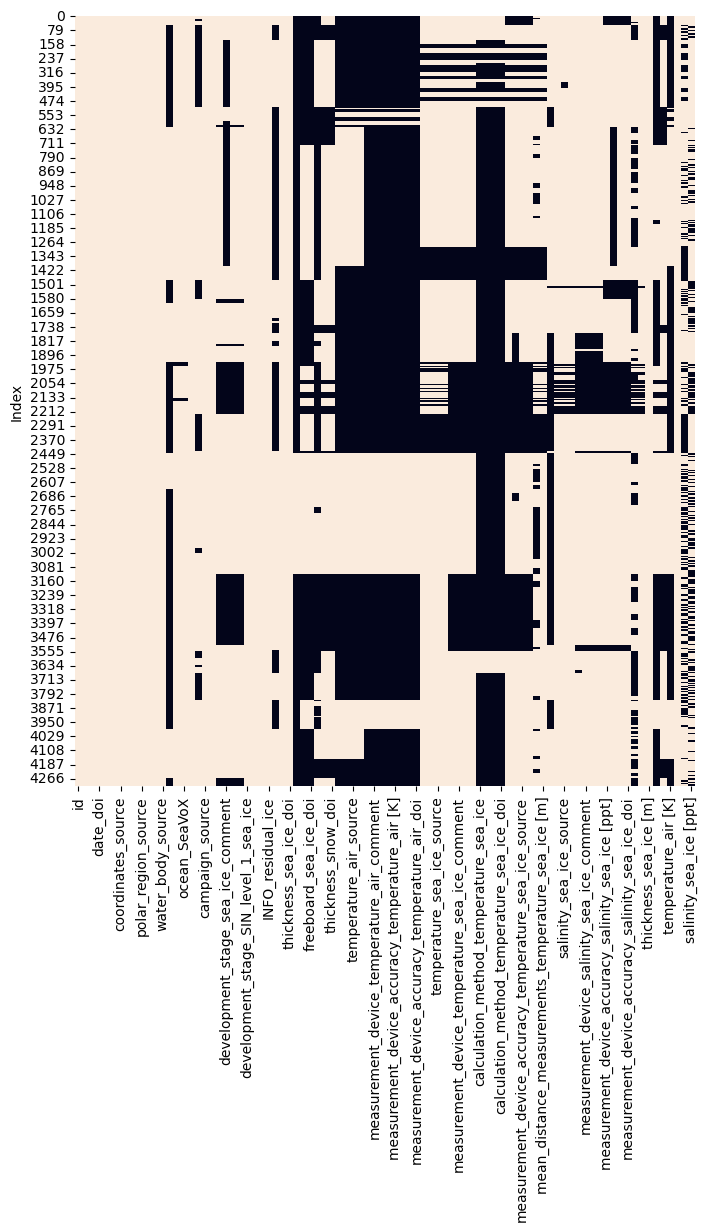

In [7]:
overview_10(df_enriched_ordered_onedepth)

6. Check temperature and salinity profiles of RESICE per id. (Some sea ice core do not have both.) 

In [8]:
temp_sal_profile_interactive(df_enriched_ordered_onedepth)

interactive(children=(IntSlider(value=0, description='index', max=286), Output()), _dom_classes=('widget-inter…

7. Create interactive data2source tracebaility plot

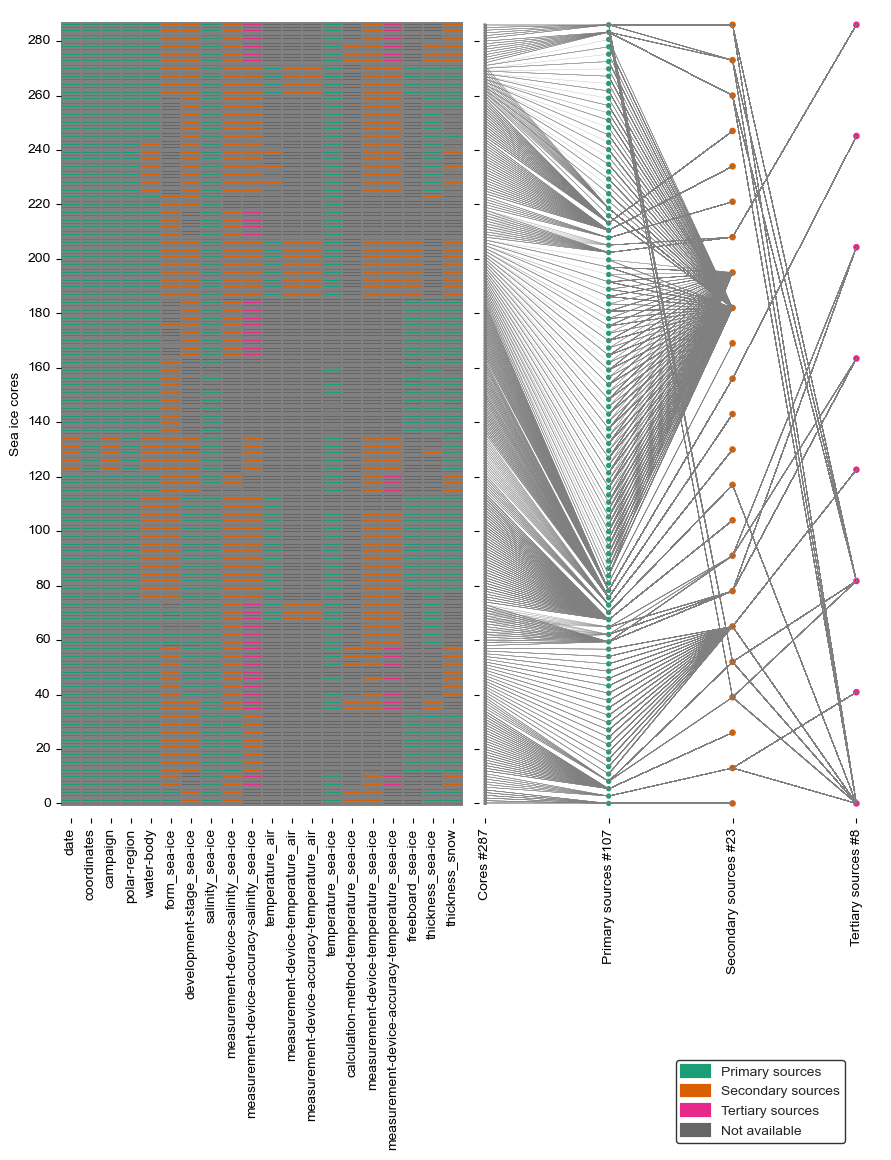

In [9]:
create_data2source_traceability_plot()

8. Create zenodo and webODV export files

In [10]:
zenodo_export(df_enriched_ordered_onedepth)
webODV_export(df_enriched_ordered_onedepth)